# Milestone 1: Project Proposal and Data Selection/Preparation

## 1: Preparing for Your Project Proposal

### 1.1: Client/Dataset Selection

Client: Lobbyists4America

Dataset name: Congressional Tweets Dataset (2008–2017)

Source (example): https://www.dropbox.com/sh/qrq1pcjsji0v03u/AAC639WcH58tM0YZperwY388a?dl=0

Why this dataset was selected:

* The dataset directly aligns with Lobbyists4America’s goal: understanding topics, key members, and relationships within U.S. Congress to inform lobbying strategy.

* Ten years (2008–2017) gives a broad temporal span to detect topic trends, shifts around major political events (e.g., elections, legislation bursts), and persistent influencers.

* Tweets include text, timestamps, user metadata, mentions/retweets — useful for NLP topic modeling, network analysis (mentions/retweets), and member-level summary statistics.

### 1.2: Data Import & Cleaning

1.2.1: Importing the Data

In [10]:
import json
import os
import pandas as pd

tweets = "data/tweets.json"
users = "data/users.json"

tweets_path = os.path.join(os.getcwd(), tweets)
users_path = os.path.join(os.getcwd(), users)

tweets_data = []
user_data = []

with open(tweets_path, "r", encoding="utf-8") as f:
    for line in f:
        if line.strip():  # skip empty lines
            tweets_data.append(json.loads(line))

with open(users_path, "r", encoding="utf-8") as f:
    for line in f:
        if line.strip():  # skip empty lines
            user_data.append(json.loads(line))

tweets_df = pd.DataFrame(tweets_data)
user_df = pd.DataFrame(user_data)


1.2.2: Removing unwanted columns 

In [11]:
tweets_columns_needed = [
    "id",
    "id_str",
    "created_at",
    "screen_name",
    "user_id",
    "text",
    "lang",
    "retweet_count",
    "favorite_count",
    "entities",
    "in_reply_to_user_id",
    "in_reply_to_screen_name",
    "source",
    "is_quote_status",
    "quoted_status_id"
]

user_columns_needed = [
    "id",
    "id_str",
    "screen_name",
    "name",
    "description",
    "followers_count",
    "friends_count",
    "favourites_count",
    "statuses_count",
    "verified",
    "protected",
    "created_at",
    "location"
]

tweets_clean = tweets_df[tweets_columns_needed]
user_clean = user_df[user_columns_needed]

1.2.2: Data Cleaning 

In [12]:
# Drop completely empty rows
tweets_clean = tweets_clean.dropna(how="all")
user_clean = user_clean.dropna(how="all")

# Fill or drop specific important columns
tweets_clean = tweets_clean.dropna(subset=["text", "created_at"])
user_clean = user_clean.dropna(subset=["id", "screen_name"])

tweets_clean.drop_duplicates(subset=["text", "created_at"], inplace=True)
user_clean.drop_duplicates(subset=["id"], inplace=True)

### 1.3: Initial exploration of data

In [13]:
# Number of rows and columns
print("Tweets dataset shape:", tweets_clean.shape)
print("User dataset shape:", user_clean.shape)

# Column names
print("\nTweets columns:", tweets_clean.columns.tolist())
print("User columns:", user_clean.columns.tolist())

# Data types and nulls
print("\nTweets info:")
tweets_clean.info()
print("\nUser info:")
user_clean.info()


Tweets dataset shape: (1243322, 15)
User dataset shape: (548, 13)

Tweets columns: ['id', 'id_str', 'created_at', 'screen_name', 'user_id', 'text', 'lang', 'retweet_count', 'favorite_count', 'entities', 'in_reply_to_user_id', 'in_reply_to_screen_name', 'source', 'is_quote_status', 'quoted_status_id']
User columns: ['id', 'id_str', 'screen_name', 'name', 'description', 'followers_count', 'friends_count', 'favourites_count', 'statuses_count', 'verified', 'protected', 'created_at', 'location']

Tweets info:
<class 'pandas.core.frame.DataFrame'>
Index: 1243322 entries, 0 to 1243369
Data columns (total 15 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   id                       1243322 non-null  int64  
 1   id_str                   1243322 non-null  object 
 2   created_at               1243322 non-null  int64  
 3   screen_name              1243322 non-null  object 
 4   user_id                  1243322 non-null

In [14]:
# Numeric stats
tweets_clean.describe()
user_clean.describe()


,id,followers_count,friends_count,favourites_count,statuses_count
count,5.480000e+02,5.480000e+02,548.000000,548.000000,548.000000
mean,7.236303e+16,1.634339e+05,2033.731752,413.912409,3658.959854
std,2.312213e+17,1.597357e+06,6278.436076,965.151440,4259.273134
min,5.558312e+06,4.000000e+00,0.000000,0.000000,0.000000
25%,5.768882e+07,8.960250e+03,368.000000,32.750000,1387.500000
50%,2.470519e+08,1.673200e+04,751.500000,120.500000,2684.000000
75%,1.212627e+09,3.308100e+04,1670.500000,379.750000,4509.250000
max,8.547151e+17,3.171258e+07,92934.000000,12507.000000,59535.000000


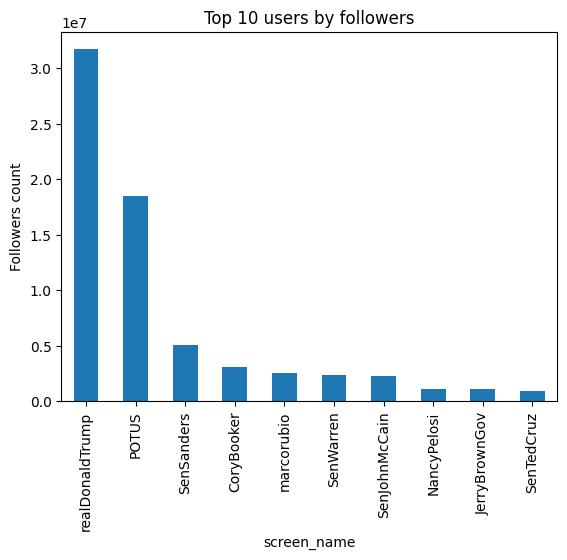

In [15]:
import matplotlib.pyplot as plt

# Top 10 users by followers
user_clean.nlargest(10, 'followers_count')[['screen_name','followers_count']].plot.bar(x='screen_name', y='followers_count', legend=False)
plt.title("Top 10 users by followers")
plt.ylabel("Followers count")
plt.show()


### 1.4 : Proposed ERD

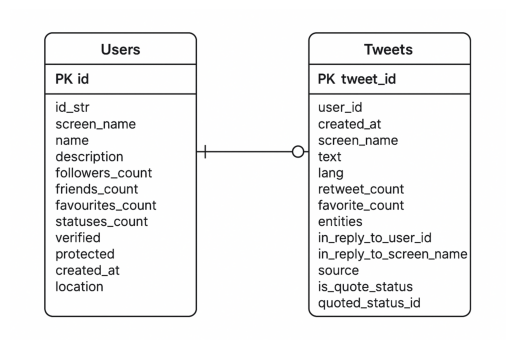

In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image
img = mpimg.imread('./data/ERD.png')

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

### 1.5 : Saving the data to CSV


In [ ]:
tweets = "data/tweets.csv"
users = "data/users..csv"

tweets_path = os.path.join(os.getcwd(), tweets)
users_path = os.path.join(os.getcwd(), users)

tweets_clean.to_csv(tweets_path, index=False)
user_clean.to_csv(users_path, index=False)

: 